In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from datetime import datetime

In [2]:
# Criando um lista para identificar possíveis valores ausentes
valores_ausentes = ["n/a", "na", "undefined"]

In [3]:
file = 'Relatório Associados Individuais.xls.csv'

In [4]:
# Três
df = pd.read_csv(file, sep=None, engine='python', header=1, na_values= valores_ausentes)

In [5]:
df.head()

,ID,Categoria,Tipo,Razão Social,Nome Fantasia,Tratamento,Nome / Responsável,Documento,Documento 2,Documento 3,...,Pais,Telefone,Comercial,Celular,Whatsapp,Email,Email Responsável,Pagamento,Expiração,Status
0,1,Individual,Física,-,-,NaN,Cadastro para Verificação,123.456.789-00,00.000.00.-5,NaN,...,Brasil,(11) 5063-0135,NaN,NaN,NaN,NaN,NaN,01/08/2024,01/08/2025,Ativo
1,21,Individual,Física,-,-,NaN,Márcia Aparecida Figueiredo,087.337.338-30,15.281.834,NaN,...,Brasil,(16) 3234-0918,NaN,(16) 99122-7646,NaN,marciaead@gmail.com,NaN,09/05/2025,08/05/2026,Ativo
2,172,Individual,Física,-,-,NaN,Mauro Cavalcante Pequeno,105.085.973-15,060105944-1,NaN,...,Brasil,(85) 3476-8702,(85) 3366-9457,(85) 98724-2263 / 999867039,(85) 3366-9457,mauro@virtual.ufc.br,mauro@virtual.ufc.br,11/07/2025,10/07/2026,Ativo
3,751,Individual,Física,-,-,NaN,Arnaldo Oliveira Souza Júnior,287.528.485-15,2.727.154-41,NaN,...,Brasil,(86) 3215-4101,NaN,(86) 9 9978-9580,NaN,"arnaldo@ufpi.edu.br,arnaldojredu@yahoo.com.br",NaN,17/09/2024,16/09/2025,Ativo
4,784,Individual,Física,-,-,NaN,Rita Maria Lino Tarcia,047.431.368-90,13.031.371,NaN,...,Brasil,(11) 3209-7825,NaN,(11) 99932-9295,NaN,rtarcia@uol.com.br,NaN,16/12/2024,15/12/2025,Ativo


In [6]:
# Alterando os parâmetros do Pandas para aumentar o número de colunas exibidas
pd.set_option('display.max_columns', 100)

In [7]:
# Alterar os parâmetros do Pandas para aumentar o número de caractéres exibidos em cada célula
pd.set_option('display.max_colwidth', 100)

In [8]:
df.shape

(396, 35)

In [9]:
# Calculando valores ausentes no df
def perc_valores_ausentes(df):
    # calcular o tatoal de células do df
    total_cells = np.prod(df.shape)
    # contar o número de valores ausentes por coluna
    missing_count = df.isnull().sum()
    # calcular o tatal de valores ausentes
    totalMissing = missing_count.sum()
    # calculando o percentual de valores ausentes
    print("O dataset tem", round(((totalMissing / total_cells) * 100), 2), "%", "de valores ausentes")

In [10]:
# Chamando a função para descobrir a porcentagem de valores ausentes no df
perc_valores_ausentes(df)

O dataset tem 12.16 % de valores ausentes


In [11]:
# Função para calcular o percentual de valores ausentes por coluna
def perc_valores_ausentes_cols(df):
    # total de valores ausentes
    mis_val = df.isnull().sum()
    # percentual de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)
    # tipo de dados das colunas com valores ausentes
    mis_val_dtypes = df.dtypes
    # criando uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtypes], axis=1)
    # renomeando as colunas
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Valores Ausentes', 1: '% de Valores Ausentes', 2: 'Dtypes'})
    # classificando a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores ausentes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    print("O dataset tem " + str(df.shape[1]) + " colunas.\n"
         "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")
    if mis_val_table_ren_columns.shape[0] == 0:
        return
    # retorna o df com informações ausentes
    return mis_val_table_ren_columns

In [12]:
df_missing = perc_valores_ausentes_cols(df)

O dataset tem 35 colunas.
Encontrado: 20 colunas que têm valores ausentes.


In [13]:
# Criando uma nova coluna com 'Data_Nascimento' com o tipo com o método do Pandas pd.to_datetime()
df['Data_Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d/%m/%Y', errors='coerce')

In [14]:
# Obtendo a data atual
data_atual = pd.to_datetime(datetime.now().date())

In [15]:
print(f"Data Atual para calculo: {data_atual.strftime('%d/%m/%Y')}\n")

Data Atual para calculo: 23/07/2025



In [16]:
# Calculando a idade
# Considerando o dia o mês e o ano do aniversário.
df['Idade_Atual'] = data_atual.year -df['Data_Nascimento'].dt.year

In [17]:
# Ajustar a idade para quem inda não fez aniversário na data corrente
nao_fez_aniver = ((data_atual.month < df['Data_Nascimento'].dt.month) | ((data_atual.month == df['Data_Nascimento'].dt.month) &
                                                                           (data_atual.day < df['Data_Nascimento'].dt.day)))

In [18]:
df.loc[nao_fez_aniver, 'Idade_Atual'] -= 1

In [19]:
# Lidando com NaT (data de nascimento inválida)
df['Idade_Atual'] = df['Idade_Atual'].fillna(0).astype('Int64')

In [35]:
# df.describe(include='object')

In [25]:
# Uma forma mais 'Pythonica' de criar o df_l panas com as idades entre 18 e 86 anos:
idade_minima = 18
idade_maxima = 86

df_l = df[
(df['Idade_Atual'] >= idade_minima) &
(df['Idade_Atual'] <= idade_maxima)
].copy() # Usando o .copy() para garantir que o df_l seja em DataFrame independente

In [28]:
# Definindo os limites e Rótulos das Faixas Etárias.
# Os limites serão os pontos de corte dos intervalos.
# O primeiro limete deve ser o mínimo possível e o último o máximo possível da sua idade.
bins = [0, 18, 25, 35, 45, 55, 65, 75, 86] # Idades (o limite superior é exclusivo por padrão)
# 0s rótulos devem ter um a menos que o número de bins
# Serão os nomes das categorias
labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-86']

In [29]:
# Criando a nova coluna 'Faixa_etaria' usando pd.cut()
df_l['Faixa_etaria'] = pd.cut(df_l['Idade_Atual'],
                             bins=bins,
                             labels=labels,
                             right=True,
                             ordered=True)

In [30]:
# Criando um histograma com os dados da nova variável 'Faixa_etaria'.
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

<Figure size 1200x700 with 0 Axes>

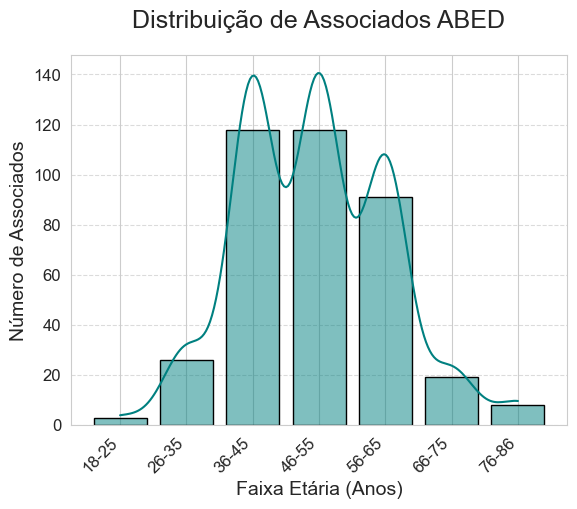

In [32]:
# Usando o sns.histplot com a nova variável categórica
# O parâmetro bins não é mais necessário pois o seaborn usa as categorias existentes
# shrik ajusta a largura das barras para criar espaço entre elas
#hue: se você quiser dividir por outra categoria (ex: gênero)
sns.histplot(data=df_l, x='Faixa_etaria',
            edgecolor='black', color='teal', shrink=0.8, kde=True)

plt.title('Distribuição de Associados ABED', fontsize=18, pad=20)
plt.xlabel('Faixa Etária (Anos)', fontsize=14)
plt.ylabel('Número de Associados', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Distribuição_Associado_ABED.png', dpi=300, bbox_inches='tight')

In [40]:
# Definir o dicionário de Mapeamento UF -> Região
map_regiao = {'AC': 'Norte', 'AM':'Norte', 'AP':'Norte', 'PA':'Norte', 'RO':'Norte', 'RR': 'Norte', 'TO':'Norte',
             'AL':'Nordeste', 'BA':'Nordeste', 'CE':'Nordeste', 'MA':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'RN':'Nordeste', 'SE':'Nordeste',
             'DF':'Centro-Oeste', 'GO':'Centro-Oeste', 'MT':'Centro-Oeste', 'MS':'Centro-Oeste',
             'ES':'Sudeste', 'MG':'Sudeste', 'RJ':'Sudeste', 'SP':'Sudeste',
             'PR':'Sul', 'RS':'Sul', 'SC':'Sul'}

In [41]:
# Criar a nova coluna Região usando o .map()
df_l['Região'] = df_l['UF'].map(map_regiao)

In [44]:
# Transformando a coluna 'Região' em tipo Categorico e atribuindo um ordem explicita
ordem_reg = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
df_l['Região'] = pd.Categorical(df_l['Região'], categories=ordem_reg, ordered=True)

In [51]:
# df_l[['Nome / Responsável', 'UF', 'Região']].head()

In [56]:
# df_l[df_l['Região'].isna()]

In [57]:
# Histograma
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

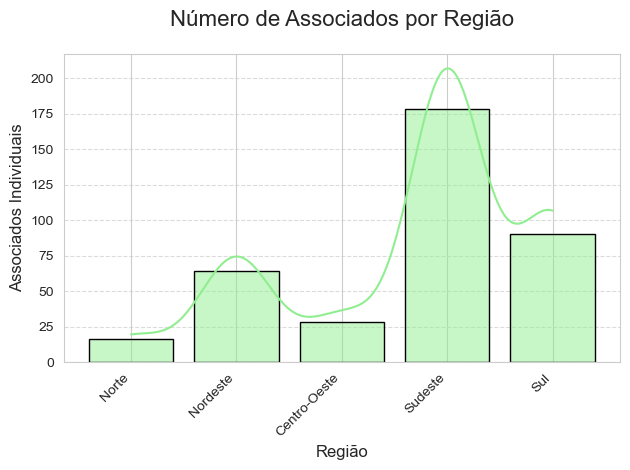

In [62]:
sns.histplot(data=df_l, x='Região', edgecolor='black', color='lightgreen', shrink=0.8, kde=True)

plt.title('Número de Associados por Região', fontsize=16, pad=20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Associados Individuais', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Associação_Ind_Regiao.png', dpi=300, bbox_inches='tight')
plt.show()